## Plotting and visualization

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Matplotlib를 이용해 그래프를 그리기 위해, ```Figure``` instance와 ```Axes``` instance를 이해할 필요가 있다.   
```Figure``` instance는 그림이 그려지는 캔버스 역할을 하고, 하나 이상의 ```Axes```를 포함할 수 있다.    
```Axes``` instance는 좌표를 제공하며, 이를 이용해 다양한 형태의 그래프를 그릴 수 있다.  

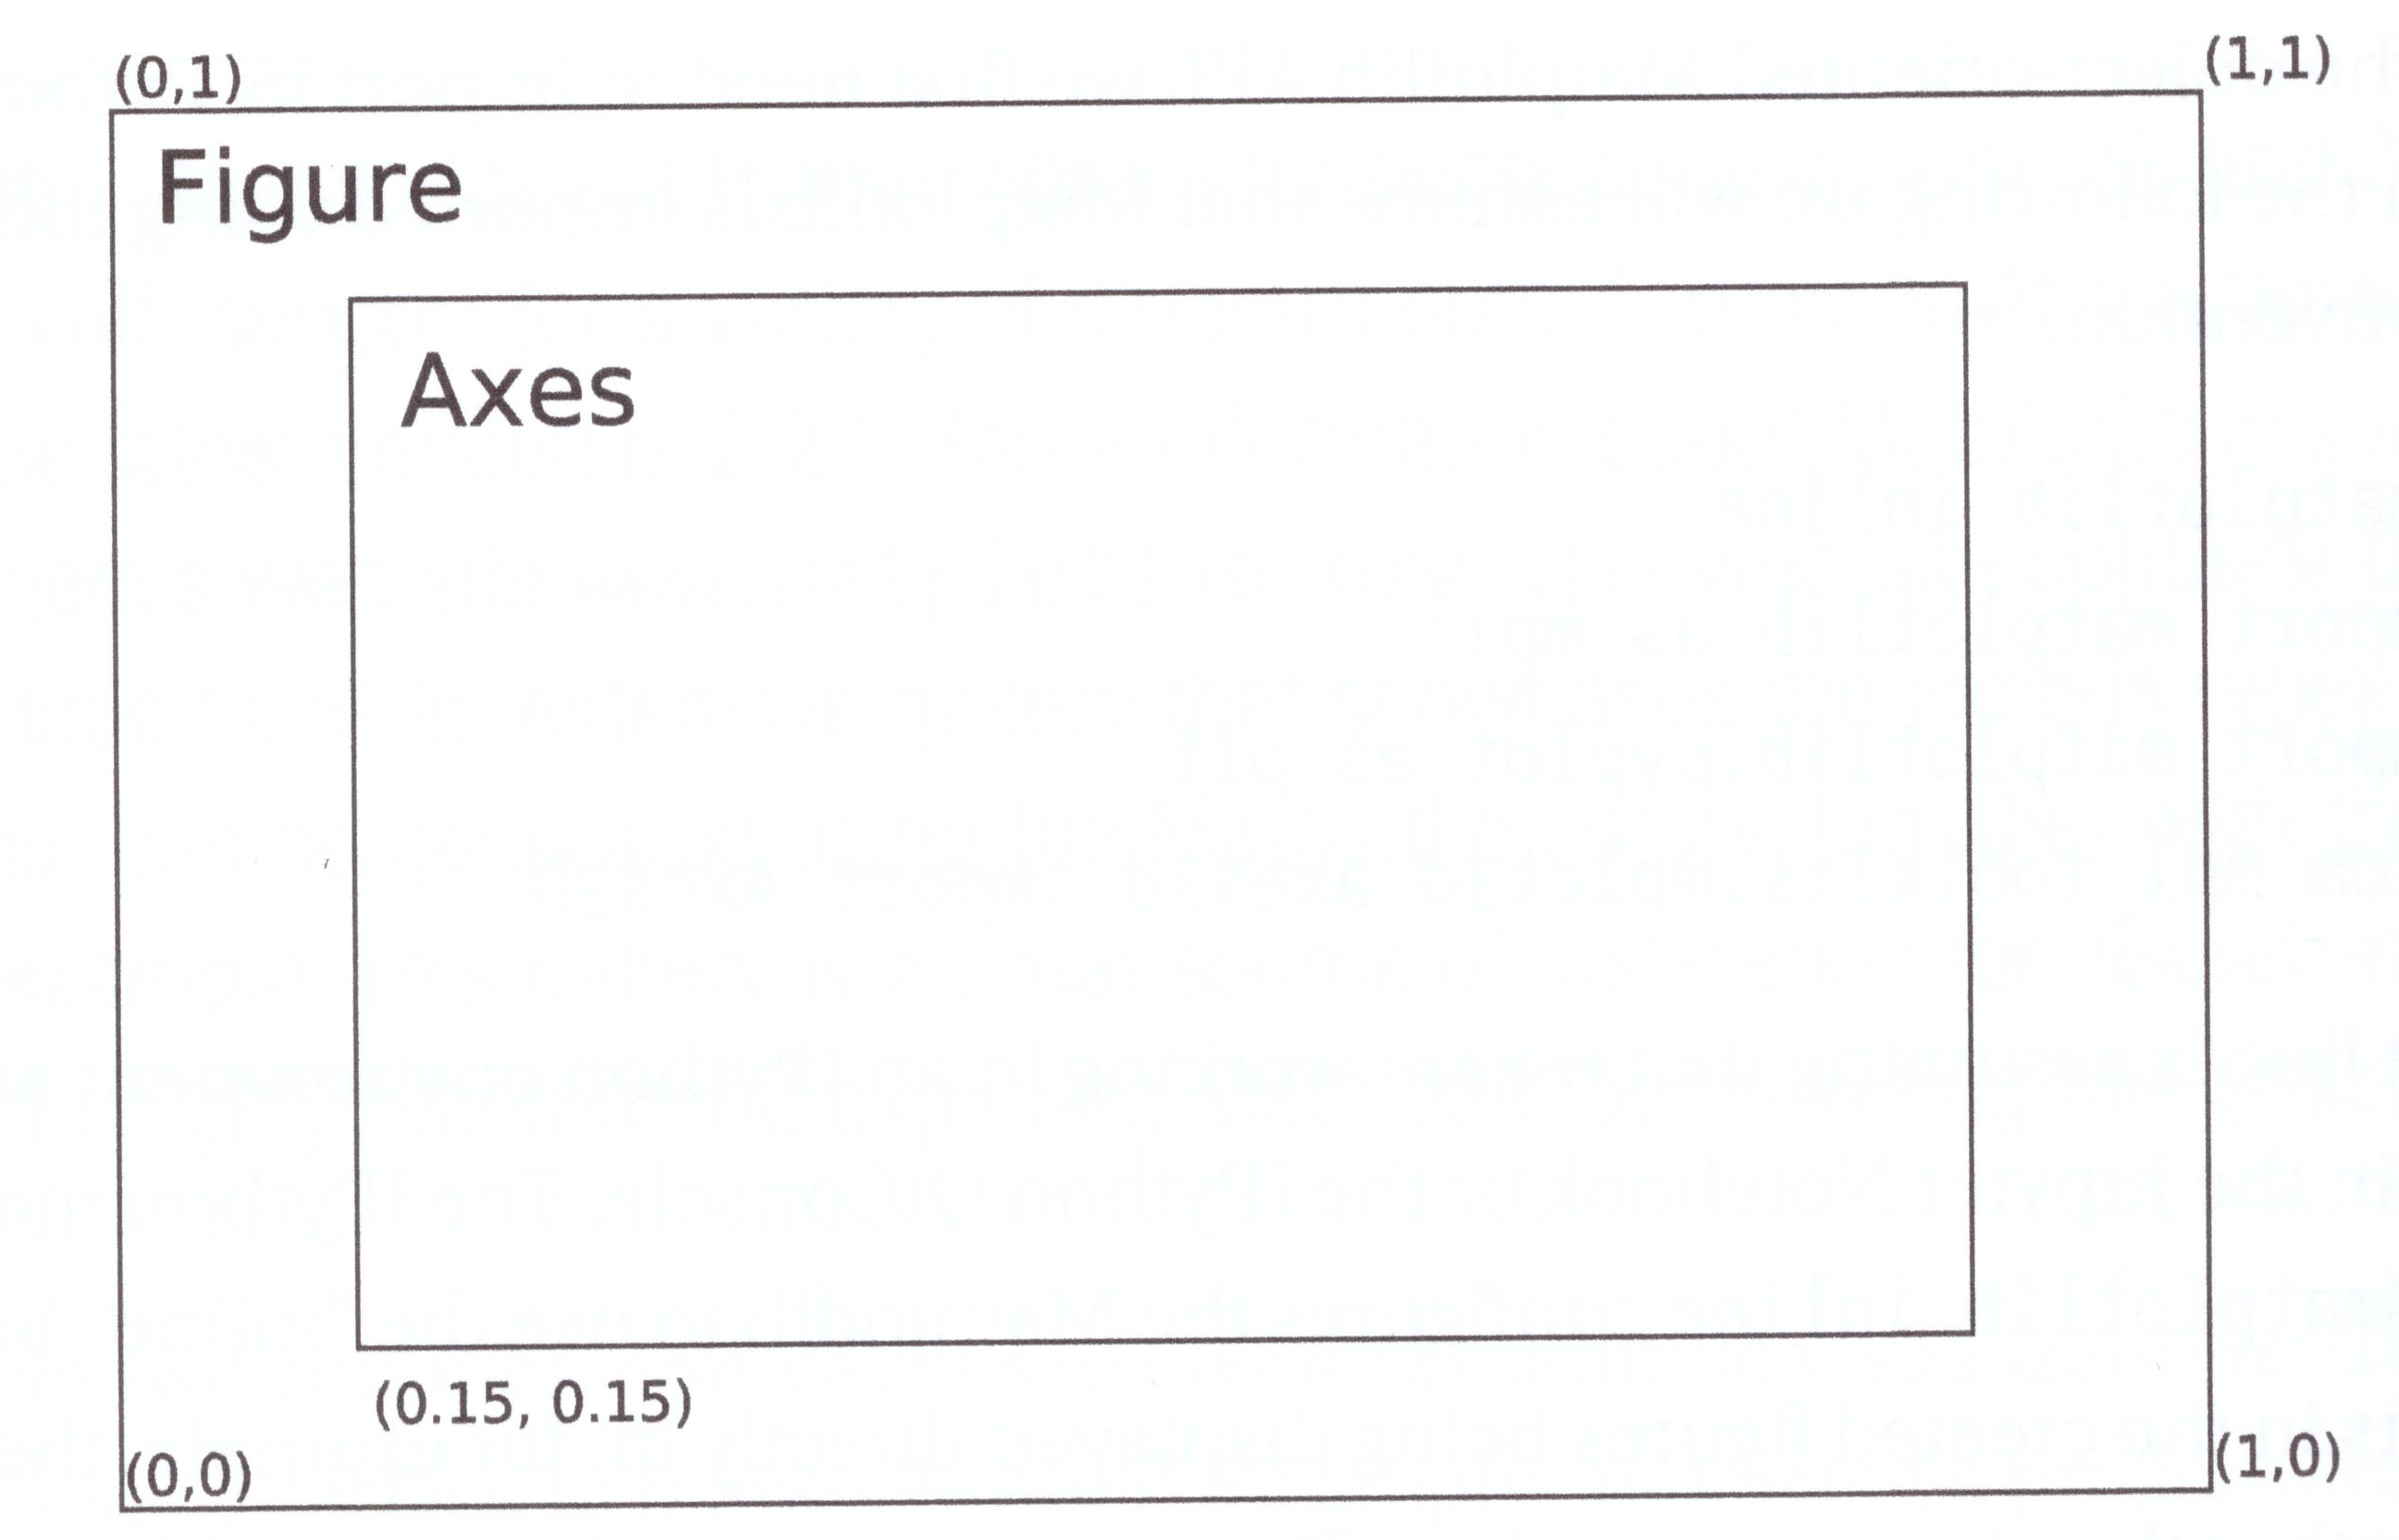

In [2]:
%matplotlib inline

In [3]:
x = np.linspace(-5, 2, 100)

In [4]:
y1 = x**3 + 5*x**2 + 10

In [5]:
y2 = 3*x**2 + 10*x

In [6]:
y3 = 6*x + 10

아래 코드에서 ```plt.subplots()```는 ```Figure``` instance와 ```Axes``` instance를 받아오는 하나의 방법이다.

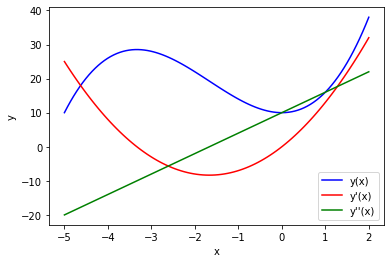

In [7]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

자세히 설명하지는 않지만, 위 그래프는 아래와 같이 더 세밀하게 표현할 수 있다.

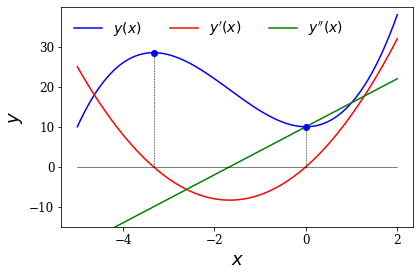

In [8]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

fig, ax = plt.subplots()

ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 + 5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], lw=0.5, ls='--', color="black")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 + 10], lw=0.5, marker='o', color="blue")

ax.set_ylim(-15, 40)
ax.set_yticks([-10, 0, 10, 20, 30])
ax.set_xticks([-4, -2, 0, 2])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=0, ncol=3, fontsize=14, frameon=False)

fig.tight_layout();

### Figure

```Figure``` 객체는 그래프를 그릴 캔버스를 제공하는 것외에 다양한 옵션을 설정할 수 있도록 한다.  
```Figure``` 객체를 받아오는 또하나의 방법은 ```plt.figure``` 함수를 이용하는 것이다.  
아래 예제에서는 ```figsize```와 ```facecolor```를 조정하였다.  
그 후, ```add_axes``` method를 이용하여 좌표 시스템을 추가한다.  
```Axes``` 객체를 생성하였으면, 그래프를 그릴 준비가 완료되었다.

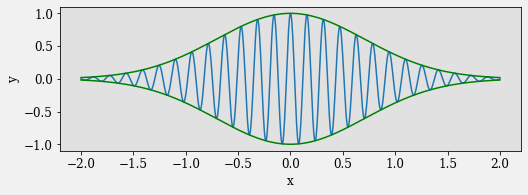

In [19]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

### Axes

그래프를 그리기 위해 먼저 ```Figure``` 객체가 필요하지만, 대부분의 중요한 작업들은 ```Axes``` 객체를 통해 이루어진다.  
앞의 예제에서 했던 것처럼, ```plt.subplots()```을 사용하면, 여러 개의 ```Axes```를 하나의 ```Figure```에 담을 수 있다.  
다음의 코드를 통해 생성된 ```axes```는 Numpy array인데, ```nrows```나 ```ncols```의 값에 따라 차원이 달라진다.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

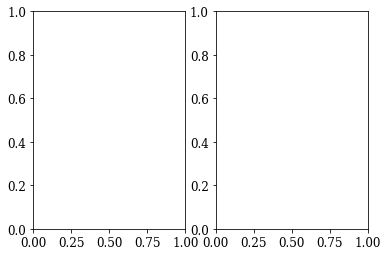

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

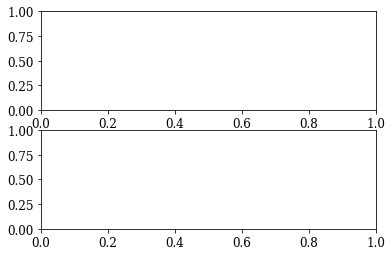

In [60]:
fig, axes = plt.subplots(nrows = 2, ncols = 1)
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

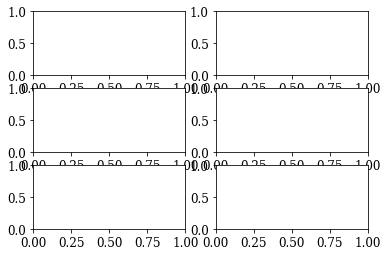

In [30]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)
axes

In [31]:
axes[0, 0]

<AxesSubplot:>

### Plot types

Axes를 통해 

In [24]:
def hide_labels(fig, ax):
    global fignum
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight')

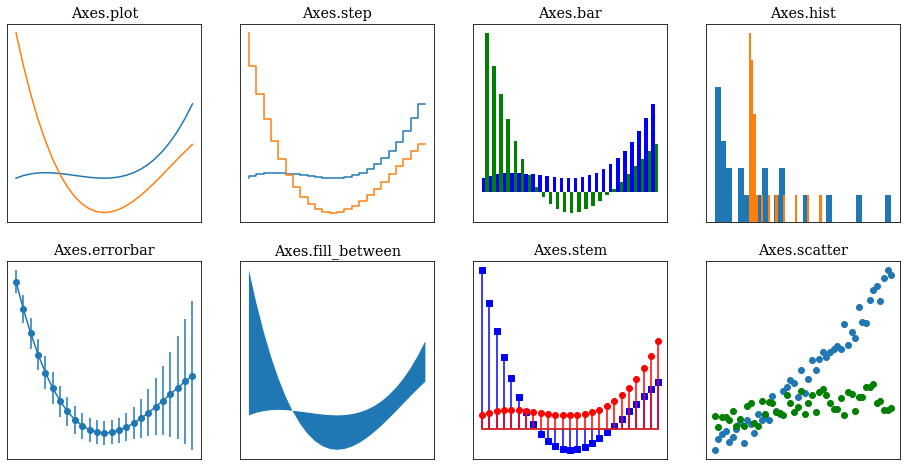

In [55]:
fig, axes = plt.subplots(figsize=(16, 8), nrows = 2, ncols = 4)

x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

axes[0, 0].plot(x, y1)
axes[0, 0].plot(x, y2)
axes[0, 0].set_title("Axes.plot")

axes[0, 1].step(x, y1)
axes[0, 1].step(x, y2)
axes[0, 1].set_title("Axes.step")

width = 6/50.0
axes[0, 2].bar(x - width/2, y1, width=width, color="blue")
axes[0, 2].bar(x + width/2, y2, width=width, color="green")
axes[0, 2].set_title("Axes.bar")

axes[0, 3].hist(y2, bins=30)
axes[0, 3].hist(y1, bins=30)
axes[0, 3].set_title("Axes.hist")

axes[1, 0].errorbar(x, y2, yerr=y1, fmt='o-')
axes[1, 0].set_title("Axes.errorbar")

axes[1, 1].fill_between(x, y1, y2)
axes[1, 1].set_title("Axes.fill_between")

axes[1, 2].stem(x, y2, linefmt='b', markerfmt='bs')
axes[1, 2].stem(x, y1, linefmt='r', markerfmt='ro')
axes[1, 2].set_title("Axes.stem")


x = np.linspace(0, 5, 50)
axes[1, 3].scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
axes[1, 3].scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")
axes[1, 3].set_title("Axes.scatter")


for i in range(2):
    for j in range(4):
        hide_labels(fig, axes[i,j])

plt.show()

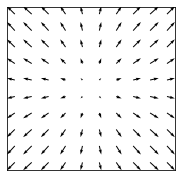

In [56]:
fig, ax = plt.subplots(figsize=(3, 3))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

x = y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = np.sin(X)
V = np.sin(Y)

ax.quiver(X, Y, U, V)

hide_labels(fig, ax)

### Line property

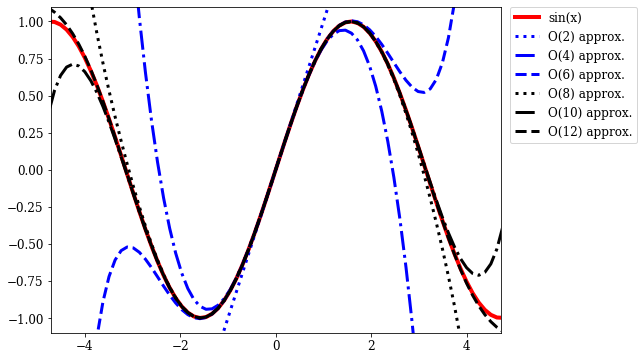

In [57]:
import sympy as s
import numpy as np

# a symbolic variable for x, and a numerical array with specific values of x
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Talyor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75);

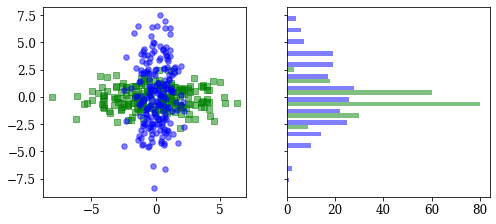

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

data1 = np.random.randn(200, 2) * np.array([3, 1])
area1 = (np.random.randn(200) + 0.5) * 100

data2 = np.random.randn(200, 2) * np.array([1, 3])
area2 = (np.random.randn(200) + 0.5) * 100

axes[0].scatter(data1[:,0], data1[:,1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:,0], data2[:,1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:,1], data2[:,1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

### Legend

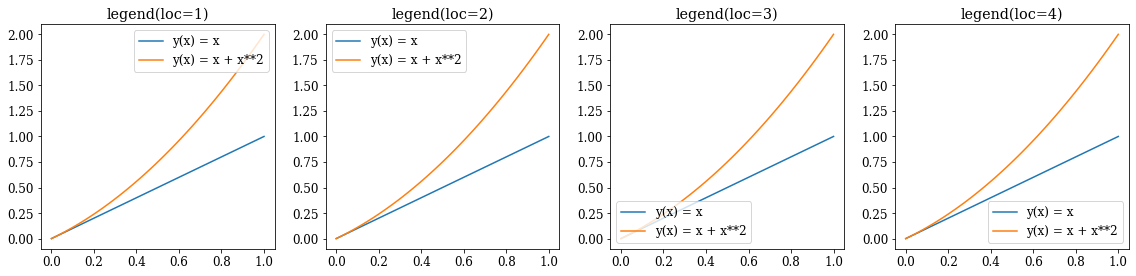

In [65]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 1, 100)

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n+1)
    axes[n].set_title("legend(loc=%d)" % (n+1))

fig.tight_layout()

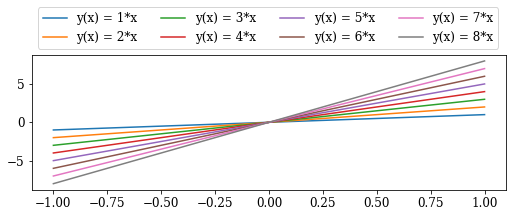

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))

x = np.linspace(-1, 1, 100)

for n in range(1, 9):
    ax.plot(x, n * x, label="y(x) = %d*x" % n)

ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1), fontsize=12)
fig.subplots_adjust(top=.75);

### Text formatting and annotation

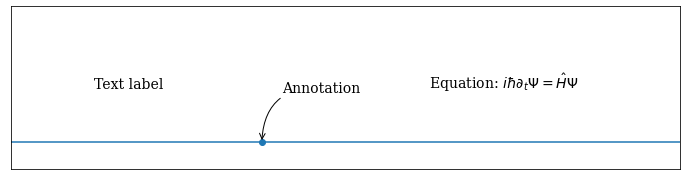

In [76]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

plt.show()

### Axis property

#### Axis label and title

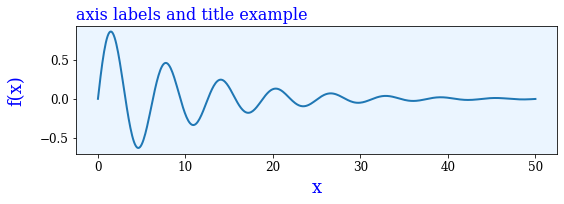

In [78]:
fig, ax = plt.subplots(figsize=(8, 3), subplot_kw={'facecolor': "#ebf5ff"})

x = np.linspace(0, 50, 500)
ax.plot(x, np.sin(x) * np.exp(-x/10), lw=2)

ax.set_xlabel("x", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("f(x)", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("axis labels and title example", loc='left',
             fontsize=16, fontname='serif', color="blue")

fig.tight_layout()

#### Axis range

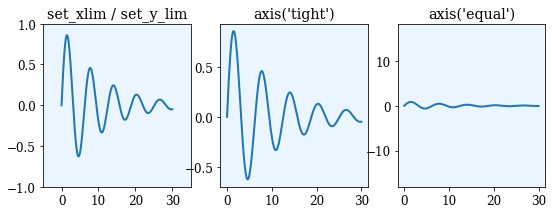

In [80]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

plt.show()

#### Ticks

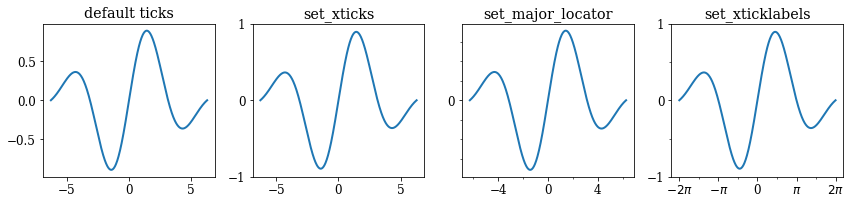

In [81]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()

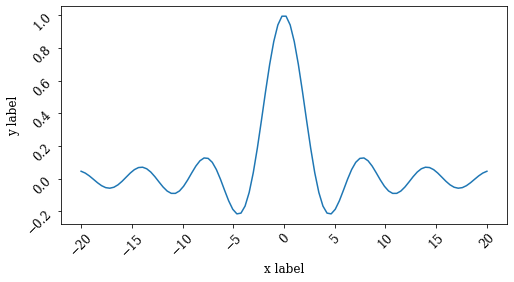

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(-20, 20, 100)
y = np.sin(x) / x

ax.plot(x, y)

ax.set_ylabel("y label")
ax.set_xlabel("x label")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

#### Grid

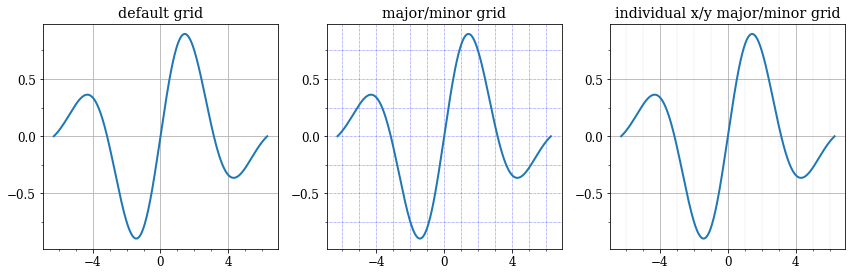

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()

#### Ticker formatting

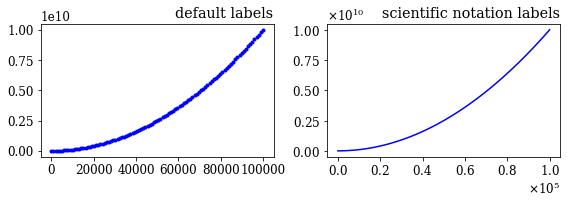

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()

### Log plot

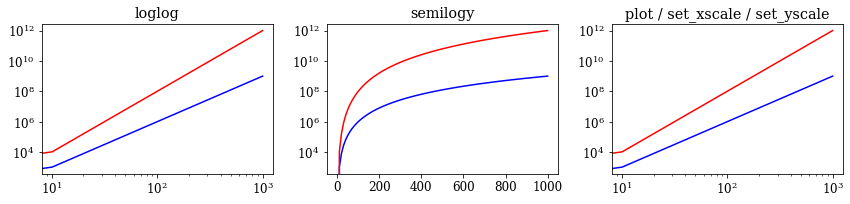

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

fig.tight_layout()

### Twin axes

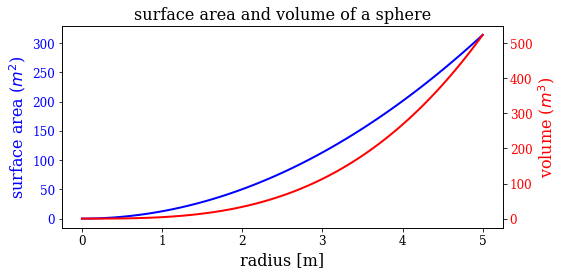

In [85]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()

### Spines

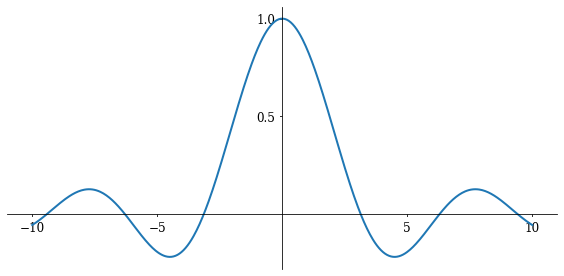

In [86]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
                    'edgecolor': 'white'})
    
fig.tight_layout()

### Inset

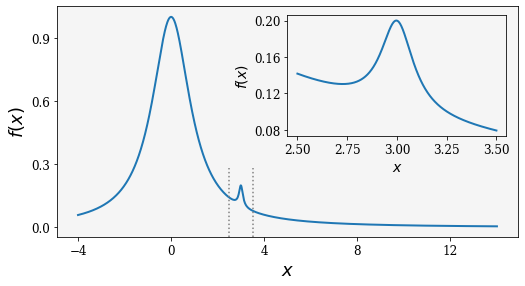

In [87]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

### Subplot

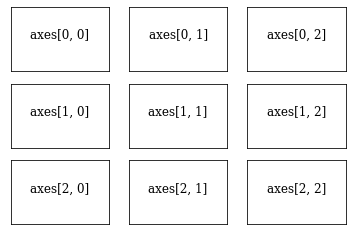

In [88]:
ncols, nrows = 3, 3

fig, axes = plt.subplots(nrows, ncols)

for m in range(nrows):
    for n in range(ncols):
        axes[m, n].set_xticks([])
        axes[m, n].set_yticks([])
        axes[m, n].text(0.5, 0.5, "axes[%d, %d]" % (m, n),
                        horizontalalignment='center')

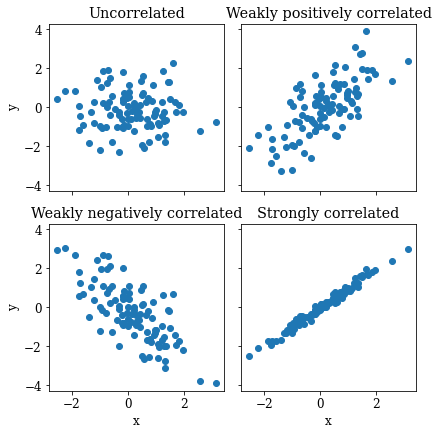

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)


[None, None, None, None, None]

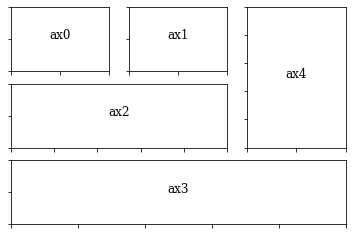

In [90]:
fig = plt.figure()

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = [ax0, ax1, ax2, ax3, ax4]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

### GridSpec

In [91]:
from matplotlib.gridspec import GridSpec

[None, None, None]

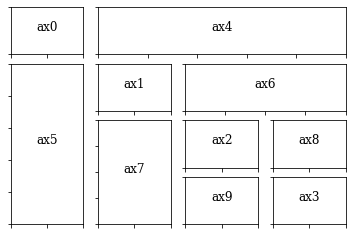

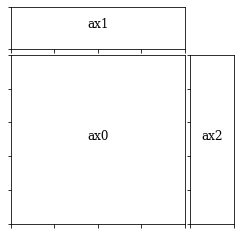

In [92]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])

ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])

ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])

ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])


def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

#fig.savefig("ch4-advanced-axes-gridspec-1.pdf")

fig = plt.figure(figsize=(4, 4))

gs = mpl.gridspec.GridSpec(2, 2,
                           width_ratios=[4, 1],
                           height_ratios=[1, 4],
                           wspace=0.05, hspace=0.05
                           )

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes = [ax0, ax1, ax2]
[ax.text(0.5, 0.5, "ax%d" % n, horizontalalignment='center') for n, ax in enumerate(axes)]
[clear_ticklabels(ax) for ax in axes]

### Colormap

Colormap은 $x-y-z$ format으로 ```Axes``` 영역의 모든 픽셀이 ```z```값에 따라 색칠되는 시스템이다.   
Matplotlib는 colormap을 위한 ```pcolor```, ```imshow``` 함수를 제공한다.  
비슷하게 contor plot을 위해 ```contour```, ```contourf``` 함수를 제공한다. 

Colormap을 그리기 위해 먼저 적절한 데이터가 준비해야 한다.  
이를 생성하기 위해 종종 Numpy ```meshgrid``` 함수가 이용된다.  
이 함수는 주어진 $x$와 $y$의 범위 내에서, 직사각형 형태의 gird를 만들고, 각 grid point의 좌표를 쉽게 이용할 수 있도록 한다.

In [101]:
x = y = np.linspace(0, 5, 6)
X, Y = np.meshgrid(x, y)
X

array([[0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.],
       [0., 1., 2., 3., 4., 5.]])

In [102]:
Y

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5.]])

In [104]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

In [107]:
R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)
Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)
Z

array([[ 4.72217473e-02,  5.24895708e-02,  5.45345766e-02, ...,
         1.97879297e-03, -3.76830787e-03, -9.60436799e-03],
       [ 5.24895708e-02,  5.45700285e-02,  5.35776394e-02, ...,
         2.17332086e-03, -2.18552264e-03, -6.65770057e-03],
       [ 5.45345766e-02,  5.35776394e-02,  4.99749958e-02, ...,
        -5.26815857e-05, -3.45198198e-03, -6.76741099e-03],
       ...,
       [ 1.97879297e-03,  2.17332086e-03, -5.26815857e-05, ...,
        -2.75152335e-03, -1.70231510e-02, -2.94243552e-02],
       [-3.76830787e-03, -2.18552264e-03, -3.45198198e-03, ...,
        -1.70231510e-02, -2.92621130e-02, -3.84875491e-02],
       [-9.60436799e-03, -6.65770057e-03, -6.76741099e-03, ...,
        -2.94243552e-02, -3.84875491e-02, -4.38144923e-02]])

```pcolor``` 함수의 ```cmap``` 인자는 미리 정의된 colormap을 사용하여 ```Z```의 값을 색깔로 변환한다. 

https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

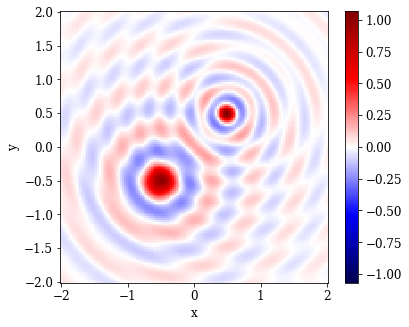

In [94]:
fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

In [108]:
help(mpl.cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    collections.abc.Mapping(collections.abc.Collection)
        ColormapRegistry
    
    class ColormapRegistry(collections.abc.Mapping)
     |  ColormapRegistry(cmaps)
     |  
     |  Container for colormaps that are known to Matplotlib by name.
     |  
     |  .. admonition:: Experimental
     |  
     |     While we expect the API to be final, we formally mark it as
     |  

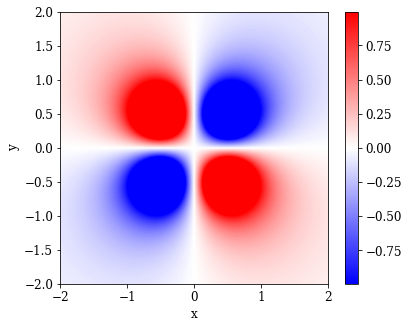

In [109]:
Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')
cb = fig.colorbar(p, ax=ax)

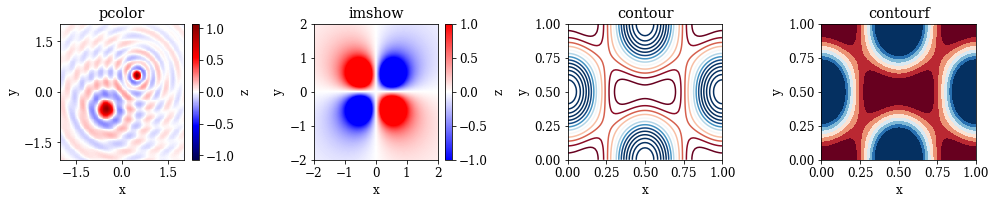

In [96]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

fig, axes = plt.subplots(1, 4, figsize=(14, 3))

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)


p = axes[0].pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
axes[0].axis('tight')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("pcolor")
axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


cb = fig.colorbar(p, ax=axes[0])
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])


Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

im = axes[1].imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

axes[1].axis('tight')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("imshow")
cb = fig.colorbar(im, ax=axes[1])

axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
#cb.ax.set_axes_locator(mpl.ticker.MaxNLocator(4))
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)
Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = axes[2].contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[2].axis('tight')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title("contour")

axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


c = axes[3].contourf(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[3].axis('tight')
axes[3].set_xlabel('x')
axes[3].set_ylabel('y')
axes[3].set_title("contourf")

axes[3].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[3].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()

Text(0, 0.5, 'y')

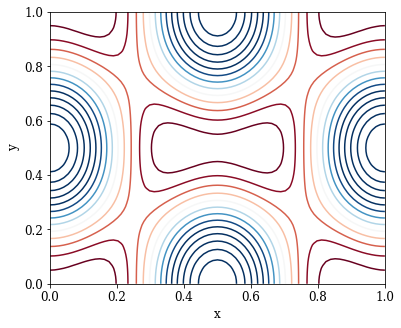

In [97]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)

Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = ax.contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight')
ax.set_xlabel('x')
ax.set_ylabel('y')

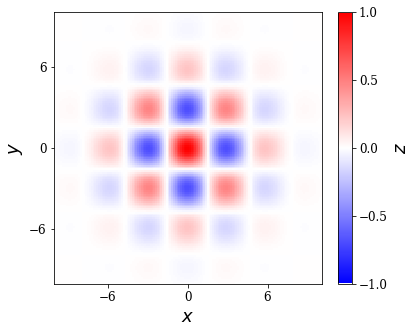

In [98]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, vmin=-abs(Z).max(), vmax=abs(Z).max(), cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])


### 3D plot

In [111]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [112]:
x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

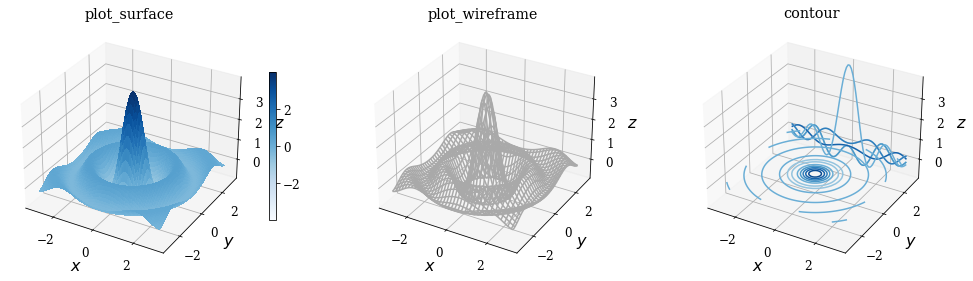

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")

fig.tight_layout()

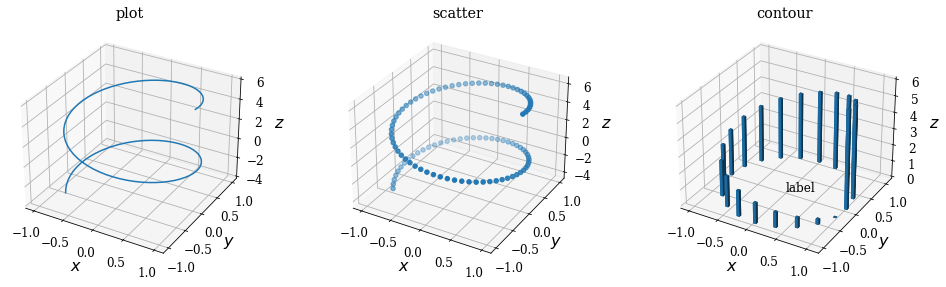

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

r = np.linspace(0, 10, 100)
p = axes[0].plot(np.cos(r), np.sin(r), 6 - r)
#cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot")

p = axes[1].scatter(np.cos(r), np.sin(r), 6 - r)
title_and_labels(axes[1], "scatter")

r = np.linspace(0, 6, 20)
p = axes[2].bar3d(np.cos(r), np.sin(r), 0* np.ones_like(r), 0.05* np.ones_like(r), 0.05 * np.ones_like(r), 6 - r)
title_and_labels(axes[2], "contour")
axes[2].text(0, 0, 0, "label")
fig.tight_layout()